<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Check-your-TensorFlow-version" data-toc-modified-id="Check-your-TensorFlow-version-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Check your TensorFlow version</a></span></li><li><span><a href="#Generate-training-data" data-toc-modified-id="Generate-training-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate training data</a></span></li><li><span><a href="#Define-a-TF-model" data-toc-modified-id="Define-a-TF-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define a TF model</a></span></li><li><span><a href="#Create-an-instance-of-a-model-and-use-it" data-toc-modified-id="Create-an-instance-of-a-model-and-use-it-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create an instance of a model and use it</a></span></li><li><span><a href="#Define-a-loss" data-toc-modified-id="Define-a-loss-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Define a loss</a></span></li><li><span><a href="#Define-a-training-function" data-toc-modified-id="Define-a-training-function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Define a training function</a></span></li><li><span><a href="#Training-of-the-model" data-toc-modified-id="Training-of-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training of the model</a></span></li><li><span><a href="#Comparison-of-found-model-parameters-and-ground-truth" data-toc-modified-id="Comparison-of-found-model-parameters-and-ground-truth-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Comparison of found model parameters and ground truth</a></span></li></ul></div>

The code here is inspired by the following blog post:
    
https://heartbeat.fritz.ai/linear-regression-using-tensorflow-2-0-1cd51e211e1f

# Check your TensorFlow version

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


# Generate training data

In [3]:
import numpy as np
nr_points = 120
np.random.normal(0,1, (nr_points))

array([-0.23582455, -0.22865379,  0.79437768,  0.66205196, -0.63635625,
       -1.01881465, -0.30839443,  1.48009595, -0.95799347, -0.16545727,
        0.41883402,  0.01585448,  2.15615246, -0.18877677,  1.02522241,
        2.29118424,  0.8769632 ,  0.5270104 ,  1.70142947, -0.35993706,
       -0.71688335,  2.11155378,  0.84048188,  0.17002752,  0.92299334,
       -1.803753  , -0.47352223, -0.42399503,  0.625032  ,  1.4381395 ,
        1.83950308,  1.16082393,  1.29108596,  0.23061775, -0.49056617,
        1.31029354,  0.04246696,  1.32492546,  0.04271286,  1.97726689,
       -0.24064769, -1.74329251, -0.06684257, -0.62803728,  1.46799224,
       -0.81480931, -0.62219286,  0.2006748 , -1.55413065, -0.33224991,
        0.25996675,  1.9791581 ,  1.64701118, -0.18985429, -0.16487597,
       -0.91802805, -0.27889714,  0.42174237,  1.67239543, -0.54705203,
       -0.86241475, -0.65457692, -0.32043436, -2.08413953,  0.63200483,
        1.0689402 ,  1.05450785,  0.66844046,  0.92224517,  1.61

In [4]:
TRUE_SLOPE = 2.0
TRUE_INTERCEPT = 0.9

x = np.linspace(0, 10, nr_points)
y = TRUE_SLOPE * x + TRUE_INTERCEPT + np.random.normal(0,1, (nr_points)) * 2.0

In [7]:
type(x)

numpy.ndarray

In [6]:
x.shape

(120,)

In [8]:
y.shape

(120,)

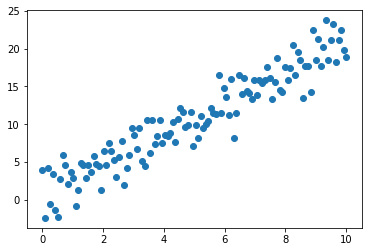

In [55]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

# Define a TF model

In [11]:
class LinearModel:
    
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(42.0)
        self.Bias = tf.Variable(1.234)

What is the magic method `__call__()` good for?

In [12]:
class test:
    
    def __call__(self,x):
        return x**3

In [13]:
t = test()

In [14]:
t(2)

8

# Create an instance of a model and use it

... without having learned the weights!

Training of the model parameters will be shown later!

In [15]:
my_model = LinearModel()

In [16]:
preds = my_model(x)

In [18]:
type(preds)

tensorflow.python.framework.ops.EagerTensor

In [19]:
preds

<tf.Tensor: id=19, shape=(120,), dtype=float32, numpy=
array([  1.234    ,   4.7634115,   8.292824 ,  11.822236 ,  15.351647 ,
        18.881058 ,  22.410471 ,  25.939882 ,  29.469294 ,  32.998707 ,
        36.52812  ,  40.05753  ,  43.586945 ,  47.116356 ,  50.645767 ,
        54.17518  ,  57.70459  ,  61.234    ,  64.76341  ,  68.29282  ,
        71.822235 ,  75.35165  ,  78.88106  ,  82.41047  ,  85.93989  ,
        89.46929  ,  92.99871  ,  96.528114 , 100.05753  , 103.586945 ,
       107.116356 , 110.64577  , 114.17518  , 117.70459  , 121.234    ,
       124.76341  , 128.29282  , 131.82222  , 135.35164  , 138.88104  ,
       142.41046  , 145.93987  , 149.46928  , 152.9987   , 156.5281   ,
       160.05753  , 163.58693  , 167.11635  , 170.64577  , 174.17517  ,
       177.70457  , 181.234    , 184.76341  , 188.29282  , 191.82222  ,
       195.35164  , 198.88106  , 202.41046  , 205.93988  , 209.46928  ,
       212.9987   , 216.5281   , 220.05753  , 223.58693  , 227.11635  ,
       23

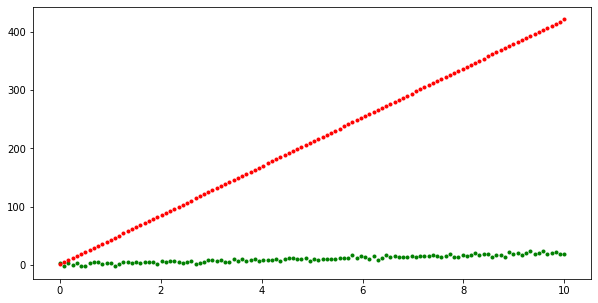

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.scatter(x,y,     color="green", marker=".", label="teacher values")
plt.scatter(x,preds, color="red",   marker=".", label="predictions")
plt.show()

# Define a loss

In [21]:
def loss(y, pred):
    """
    compute the loss of the model
    
    here it is defined as the mean
    squared error (MSE)
    """
    return tf.reduce_mean(tf.square(y - pred))

# Define a training function

For TensorFlow to be able to automatically compute the gradient of a loss function with respect to the model parameters (here: `linear_model.Weight` and `linear_model.Bias`), we need to know which tensor ops were computed.

These operations are recorded on a gradient tape using a `tf.GradientTape()` context manager:

In [23]:
def train(linear_model, x, y, lr=0.12):
    """
    Train the model using backpropagation
    
    Given a model linear_model and an input
    x and a desired output y, we
    1. do one forward step
    2. retrieve the gradient of the loss function
       with respect to the model parameters
    3. do a step in to the negative direction
       of the gradient (multiplied by the
       learning rate lr), i.e., do gradient descent
    """
    
    # 1. 
    # Compute the loss
    # This indirectly induces the computation
    # the output of the model by
    # linear_model(x)
    # which is implemented by the __call__()
    # function
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    # 2.
    # Automatically compute the gradient
    # of the loss with respect to the
    # two model parameters
    dloss_dweight, dloss_dbias = \
        t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    
    # 3.
    # Do gradient descent
    
    # Weight -= lr * dloss_dweight        
    linear_model.Weight.assign_sub(lr * dloss_dweight)  
    # Bias -= lr * dloss_dbias
    linear_model.Bias.assign_sub  (lr * dloss_dbias)

# Training of the model

In [50]:
linear_model = LinearModel()
Weights, Biases, Losses = [], [], []
epochs = 2000
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    Losses.append(real_loss)
    
    train(linear_model, x, y, lr=0.02)
    if epoch_count % 10 == 0:
        print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 53734.83984375
Epoch count 10: Loss value: 10.012301445007324
Epoch count 20: Loss value: 8.953816413879395
Epoch count 30: Loss value: 8.086469650268555
Epoch count 40: Loss value: 7.375668525695801
Epoch count 50: Loss value: 6.793159008026123
Epoch count 60: Loss value: 6.315784931182861
Epoch count 70: Loss value: 5.924570083618164
Epoch count 80: Loss value: 5.6039652824401855
Epoch count 90: Loss value: 5.3412251472473145
Epoch count 100: Loss value: 5.125906467437744
Epoch count 110: Loss value: 4.9494500160217285
Epoch count 120: Loss value: 4.804841995239258
Epoch count 130: Loss value: 4.686334133148193
Epoch count 140: Loss value: 4.589215278625488
Epoch count 150: Loss value: 4.509625434875488
Epoch count 160: Loss value: 4.444399833679199
Epoch count 170: Loss value: 4.390946865081787
Epoch count 180: Loss value: 4.347141742706299
Epoch count 190: Loss value: 4.311242580413818
Epoch count 200: Loss value: 4.281822681427002
Epoch count 210: Loss v

Epoch count 1800: Loss value: 4.148241996765137
Epoch count 1810: Loss value: 4.148241996765137
Epoch count 1820: Loss value: 4.148241996765137
Epoch count 1830: Loss value: 4.148241996765137
Epoch count 1840: Loss value: 4.148241996765137
Epoch count 1850: Loss value: 4.148241996765137
Epoch count 1860: Loss value: 4.148241996765137
Epoch count 1870: Loss value: 4.148241996765137
Epoch count 1880: Loss value: 4.148241996765137
Epoch count 1890: Loss value: 4.148241996765137
Epoch count 1900: Loss value: 4.148241996765137
Epoch count 1910: Loss value: 4.148241996765137
Epoch count 1920: Loss value: 4.148241996765137
Epoch count 1930: Loss value: 4.148241996765137
Epoch count 1940: Loss value: 4.148241996765137
Epoch count 1950: Loss value: 4.148241996765137
Epoch count 1960: Loss value: 4.148241996765137
Epoch count 1970: Loss value: 4.148241996765137
Epoch count 1980: Loss value: 4.148241996765137
Epoch count 1990: Loss value: 4.148241996765137


# Comparison of found model parameters and ground truth

In [51]:
TRUE_SLOPE

2.0

In [52]:
TRUE_INTERCEPT

0.9

In [53]:
Weights[-1]

2.0219421

In [54]:
Biases[-1]

0.6544894

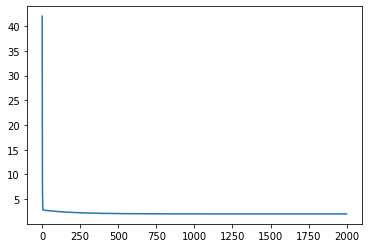

In [43]:
plt.plot(Weights)
plt.show()

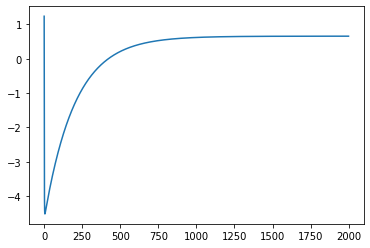

In [44]:
plt.plot(Biases)
plt.show()